Import lib

In [36]:
# from plotDecBoundaries import plotDecBoundaries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

X: traning data (# sample, # dim) or say (# sample, # feature)

In [37]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
print(X.shape)
print(X)

(6, 2)
[[ 1  2]
 [ 1  4]
 [ 1  0]
 [10  2]
 [10  4]
 [10  0]]


Create labels

In [38]:
labels = np.array([0, 0, 1, 1, 1, 0])
print(labels.shape)
print(labels)

(6,)
[0 0 1 1 1 0]


Find unique labels

In [40]:
np.unique(labels)

array([0, 1])

Original code is hard coded, the class labels must start from 1

It uses 'max' to find the number of classes

In [39]:
nclass =  max(np.unique(labels))
nclass

1

Class labels start from 1

In [40]:
labels = labels + 1
print(labels)
nclass =  max(np.unique(labels))
print(nclass)

[1 1 2 2 2 1]
2


You can also use 'len' to find the number of classes. 

Then, no requirements for the start of the label. But you need to change the plot part accordingly.

In [41]:
nclass =  len(np.unique(labels))
print(nclass)

2


Plot range

Round example 

In [42]:
round_example = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
print('Input vector',round_example)
print('ceil result ',np.ceil(round_example))
print('floor result',np.floor(round_example))

Input vector [-1.7 -1.5 -0.2  0.2  1.5  1.7  2. ]
ceil result  [-1. -1. -0.  1.  2.  2.  2.]
floor result [-2. -2. -1.  0.  1.  1.  2.]


In [9]:
max_x = np.ceil(max(X[:, 0])) + 1
min_x = np.floor(min(X[:, 0])) - 1
max_y = np.ceil(max(X[:, 1])) + 1
min_y = np.floor(min(X[:, 1])) - 1

xrange = (min_x, max_x)
yrange = (min_y, max_y)
print("x range:",xrange,"y range",yrange)

x range: (0.0, 11.0) y range (-1.0, 5.0)


Create mesh grid using np.meshgrid

np.meshgrid: Return coordinate matrices from coordinate vectors.

In [10]:
# inc = 0.005
inc = 0.5

(x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))


In [11]:
print(x)

[[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
   7.   7.5  8.   8.5  9.   9.5 10.  10.5 11. ]
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.

In [12]:
print(y)

[[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
   1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]
 [ 2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   2.   2. ]
 [ 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5
   2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5]
 [ 3.   3.   3.   3.   3.   3.   3.   3.   3

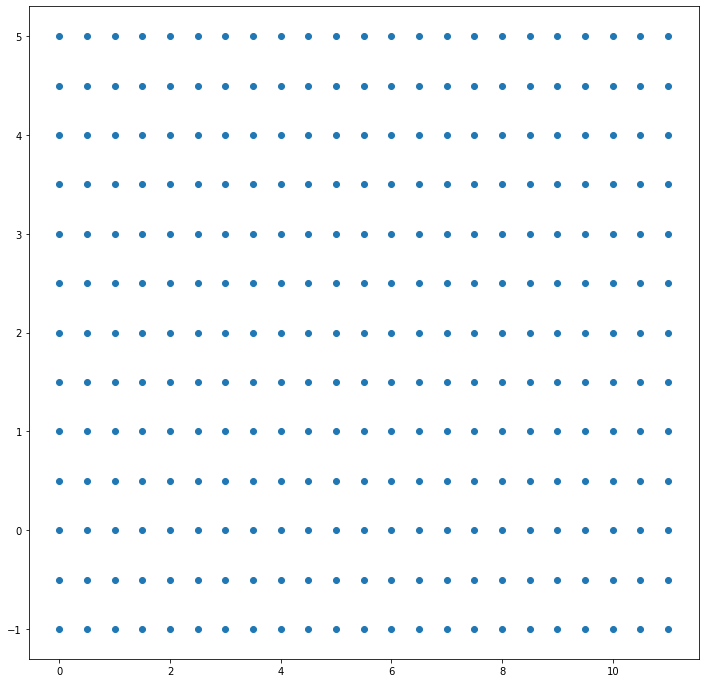

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(x, y)
plt.show()

Get coord of grids

In [27]:
xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) )

In [28]:
print(xy)

[[ 0.  -1. ]
 [ 0.  -0.5]
 [ 0.   0. ]
 [ 0.   0.5]
 [ 0.   1. ]
 [ 0.   1.5]
 [ 0.   2. ]
 [ 0.   2.5]
 [ 0.   3. ]
 [ 0.   3.5]
 [ 0.   4. ]
 [ 0.   4.5]
 [ 0.   5. ]
 [ 0.5 -1. ]
 [ 0.5 -0.5]
 [ 0.5  0. ]
 [ 0.5  0.5]
 [ 0.5  1. ]
 [ 0.5  1.5]
 [ 0.5  2. ]
 [ 0.5  2.5]
 [ 0.5  3. ]
 [ 0.5  3.5]
 [ 0.5  4. ]
 [ 0.5  4.5]
 [ 0.5  5. ]
 [ 1.  -1. ]
 [ 1.  -0.5]
 [ 1.   0. ]
 [ 1.   0.5]
 [ 1.   1. ]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.5]
 [ 1.   3. ]
 [ 1.   3.5]
 [ 1.   4. ]
 [ 1.   4.5]
 [ 1.   5. ]
 [ 1.5 -1. ]
 [ 1.5 -0.5]
 [ 1.5  0. ]
 [ 1.5  0.5]
 [ 1.5  1. ]
 [ 1.5  1.5]
 [ 1.5  2. ]
 [ 1.5  2.5]
 [ 1.5  3. ]
 [ 1.5  3.5]
 [ 1.5  4. ]
 [ 1.5  4.5]
 [ 1.5  5. ]
 [ 2.  -1. ]
 [ 2.  -0.5]
 [ 2.   0. ]
 [ 2.   0.5]
 [ 2.   1. ]
 [ 2.   1.5]
 [ 2.   2. ]
 [ 2.   2.5]
 [ 2.   3. ]
 [ 2.   3.5]
 [ 2.   4. ]
 [ 2.   4.5]
 [ 2.   5. ]
 [ 2.5 -1. ]
 [ 2.5 -0.5]
 [ 2.5  0. ]
 [ 2.5  0.5]
 [ 2.5  1. ]
 [ 2.5  1.5]
 [ 2.5  2. ]
 [ 2.5  2.5]
 [ 2.5  3. ]
 [ 2.5  3.5]
 [ 2.5  4. ]
 [ 2.5  4.5]

Create the fake sample mean. 

You should find calculate the sample mean by the training data.

In [43]:
sample_mean = np.zeros((2,2))
sample_mean[0,0] = 4
sample_mean[0,1] = 3
sample_mean[1,0] = 8
sample_mean[1,1] = 4
sample_mean

array([[4., 3.],
       [8., 4.]])

cdist computes the distance of each sample mean (each mean is in the row of the matrix) with each row of the xy matrix (each point) 

scipy.spatial.distance.cdist(XA, XB, metric='euclidean', *, out=None, **kwargs)
Compute distance between each pair of the two collections of inputs.

In [30]:
image_size = x.shape
# distance measure evaluations for each (x,y) pair.
dist_mat = cdist(xy, sample_mean)
dist_mat


array([[5.65685425, 9.43398113],
       [5.31507291, 9.17877988],
       [5.        , 8.94427191],
       [4.71699057, 8.7321246 ],
       [4.47213595, 8.54400375],
       [4.27200187, 8.38152731],
       [4.12310563, 8.24621125],
       [4.03112887, 8.1394103 ],
       [4.        , 8.06225775],
       [4.03112887, 8.01560977],
       [4.12310563, 8.        ],
       [4.27200187, 8.01560977],
       [4.47213595, 8.06225775],
       [5.31507291, 9.01387819],
       [4.94974747, 8.74642784],
       [4.60977223, 8.5       ],
       [4.30116263, 8.27647268],
       [4.03112887, 8.07774721],
       [3.80788655, 7.90569415],
       [3.64005494, 7.76208735],
       [3.53553391, 7.64852927],
       [3.5       , 7.56637298],
       [3.53553391, 7.51664819],
       [3.64005494, 7.5       ],
       [3.80788655, 7.51664819],
       [4.03112887, 7.56637298],
       [5.        , 8.60232527],
       [4.60977223, 8.32165849],
       [4.24264069, 8.06225775],
       [3.90512484, 7.82623792],
       [3.

find which column (which corresponds to the distance with each sample mean) is min. That is the predicted label

In [31]:
pred_label = np.argmin(dist_mat, axis=1)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:

# reshape the idx (which contains the class label) into an image.
decisionmap = pred_label.reshape(image_size, order='F')
decisionmap

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1

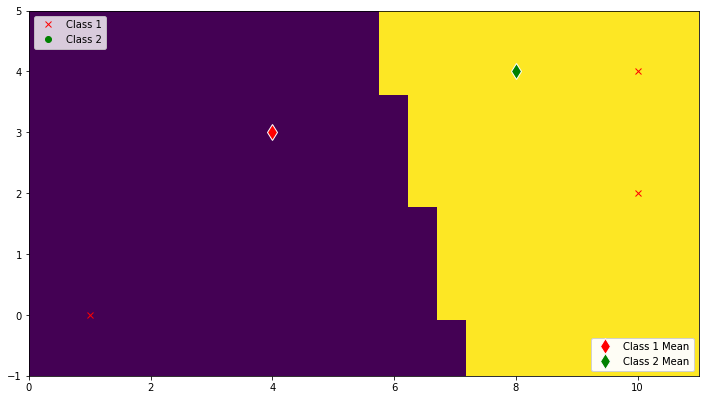

In [35]:
#show the image, give each coordinate a color according to its class label
plt.figure(figsize=(12,12))
plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

# plot the class training data.
plt.plot(X[labels == 1, 0],X[labels == 1, 1], 'rx')
plt.plot(X[labels == 2, 0],X[labels == 2, 1], 'go')

l = plt.legend(('Class 1', 'Class 2'), loc=2)
plt.gca().add_artist(l)

# plot the class mean vector.
m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')

# include legend for class mean vector
l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

plt.gca().add_artist(l1)

plt.show()